In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
ea = pd.read_csv('Attrition.csv')
ea.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [267]:
ea.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [268]:
ea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [269]:
ea.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

##1. Checking for missing Values

In [270]:
ea.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

##2.	Understand what factors contributed most to employee turnover by EDA.

*A.	Heatmap of the Correlation Matrix between all numerical features/columns in the data.

In [271]:
num_feature_list1 = [i for i in ea.columns if ea.dtypes[i] == 'int64']
num_feature_list1


['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [272]:
cr_m = ea[num_feature_list1].corr()
cr_m

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
number_project,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

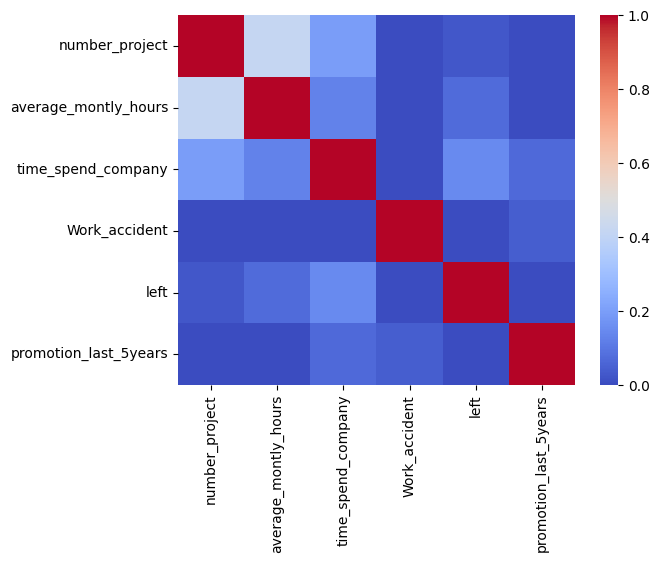

In [273]:
sns.heatmap(cr_m, vmin=0, vmax=1, cmap= 'coolwarm' )

B.Distribution plot -

■	Employee Satisfaction (use column satisfaction_level)

■	Employee Evaluation (use column last_evaluation)

■	Employee Average Monthly Hours (use column average_montly_hours)


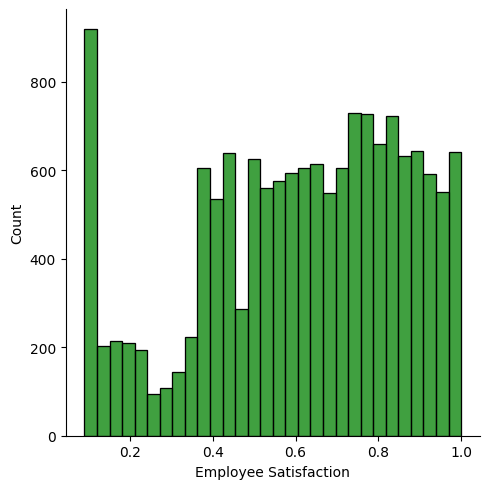

In [274]:
sns.displot(ea['satisfaction_level'], kde = False, color = 'green', bins=30)
plt.xlabel('Employee Satisfaction')
plt.show()

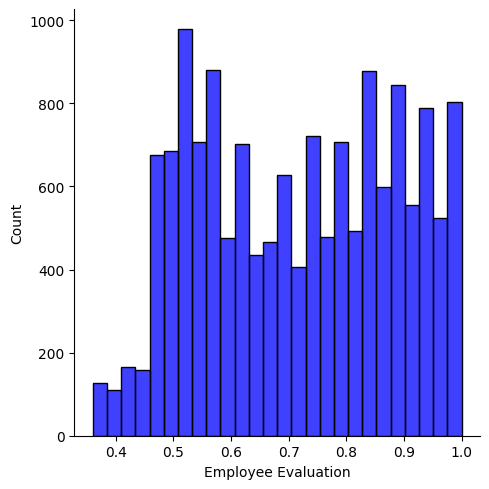

In [275]:
sns.displot(data = ea['last_evaluation'], kde = False , color = 'blue')
plt.xlabel('Employee Evaluation')
plt.show()

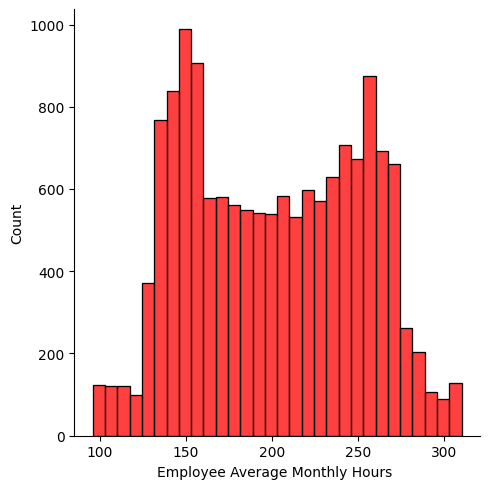

In [276]:
sns.displot(data = ea['average_montly_hours'], kde = False, color = 'red')
plt.xlabel('Employee Average Monthly Hours ')
plt.show()

C.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

<Axes: xlabel='number_project'>

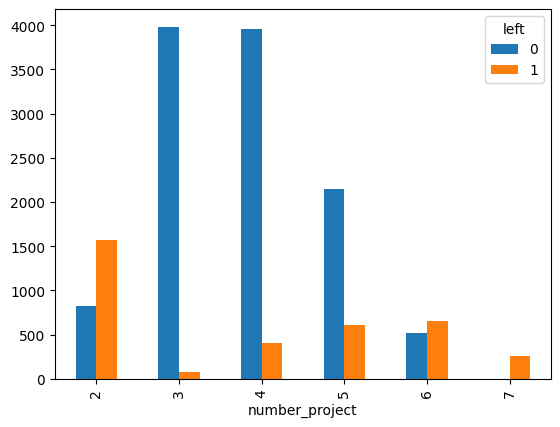

In [277]:
pd.crosstab(ea.number_project, ea.left).plot(kind = 'bar')

##3.	Perform clustering of Employees who left based on their satisfaction and evaluation.

In [278]:
ea_left = ea[ea['left'] == 1]
ea_left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


2. Selecting column based on satisfaction_level, last_evaluation and left.

In [279]:
ea_left_cluster = ea_left[['satisfaction_level', 'last_evaluation']]
ea_left_cluster

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52
...,...,...
14994,0.40,0.57
14995,0.37,0.48
14996,0.37,0.53
14997,0.11,0.96


3. KMeans clustering of employees who left the company into 3 clusters.

In [280]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3, random_state = 42)
ea_left['cluster'] = k_means.fit_predict(ea_left_cluster)

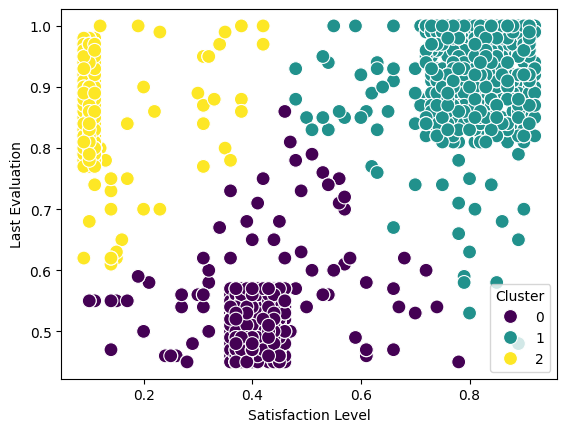

In [281]:
sns.scatterplot(x = 'satisfaction_level', y='last_evaluation',  hue='cluster', data = ea_left, palette='viridis', s=100 )
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend(title='Cluster')
plt.show()

3. Analysis of Clusters

***Thoughts on Employee Clusters***

**Cluster 0 (Low satisfaction, High evaluation)**: These employees might be feeling overworked or underappreciated despite performing well. This cluster indicates a potential area where the company could improve employee engagement or address workload issues.

**Cluster 1 (High satisfaction, High evaluation)**: These employees are satisfied and performing well but still left the company. This could indicate external factors such as better opportunities elsewhere or personal reasons. Retention strategies might focus on understanding and addressing these external factors.

**Cluster 2 (Low satisfaction, Low evaluation)**: These employees are neither satisfied nor performing well, which is a critical area for intervention. Identifying the root causes (e.g., inadequate training, poor fit for the role) and addressing them could prevent similar future losses.

###4.	Handle the left Class Imbalance using SMOTE technique.

4.1.	Pre-Process the data by converting categorical columns to numerical columns by

■	Separating categorical variables and numeric variables.

■	Applying get_dummies() to the categorical variables.

■	Combining categorical variables and numeric variables.


In [282]:
#Separating categorical variables and numeric variables.
#identifying the categorical variable
num_feature_list2 = [f for f in ea.columns if ea.dtypes[f] == 'object']
num_feature_list2

['sales', 'salary']

In [283]:
#combining categorical variable and numeric variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ea['salary'] = le.fit_transform(ea['salary'])
ea['sales'] = le.fit_transform(ea['sales'])
ea.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1


2) Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [284]:
#train test split

from sklearn.model_selection import train_test_split
X = ea.drop('left', axis =1)
y = ea['left']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state =42)

In [285]:
y_test

6723     0
6473     0
4679     0
862      1
7286     0
        ..
3456     0
11768    0
3271     0
4940     0
9223     0
Name: left, Length: 12000, dtype: int64

3) Upsample the train dataset using SMOTE technique from the imblearn module.

In [286]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


##5.	Perform 5-Fold cross-validation model training and evaluate performance.

In [287]:
import warnings
warnings.filterwarnings('ignore')

**1. Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report.**

In [288]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [289]:
#predict model
y_pred_lr_model = lr_model.predict(X_test)

In [290]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_score_lr = cross_val_score(lr_model, X_train_resampled, y_train_resampled, cv =5, scoring = 'accuracy')
print(cv_score_lr)


[0.74725275 0.79340659 0.77142857 0.76787679 0.78217822]


In [291]:
#classification report
from sklearn.metrics import classification_report
cl_accuracy_lr = classification_report(y_test, y_pred_lr_model)
print(cl_accuracy_lr)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      9154
           1       0.48      0.74      0.58      2846

    accuracy                           0.75     12000
   macro avg       0.69      0.74      0.70     12000
weighted avg       0.80      0.75      0.76     12000



In [292]:
#Convert & Plot the classification report
cl_accuracy_lr =  classification_report(y_test, y_pred_lr_model, output_dict =True)
cl_accuracy_lr




{'0': {'precision': 0.9022556390977443,
  'recall': 0.7472143325322264,
  'f1-score': 0.8174484613086347,
  'support': 9154},
 '1': {'precision': 0.4763521158633175,
  'recall': 0.7396345748418833,
  'f1-score': 0.5794907088781831,
  'support': 2846},
 'accuracy': 0.7454166666666666,
 'macro avg': {'precision': 0.6893038774805309,
  'recall': 0.7434244536870549,
  'f1-score': 0.6984695850934088,
  'support': 12000},
 'weighted avg': {'precision': 0.8012455201706462,
  'recall': 0.7454166666666666,
  'f1-score': 0.7610128143572126,
  'support': 12000}}

In [293]:
cl_accuracy_lr_df = pd.DataFrame(cl_accuracy_lr).transpose()
print(cl_accuracy_lr_df)

              precision    recall  f1-score       support
0              0.902256  0.747214  0.817448   9154.000000
1              0.476352  0.739635  0.579491   2846.000000
accuracy       0.745417  0.745417  0.745417      0.745417
macro avg      0.689304  0.743424  0.698470  12000.000000
weighted avg   0.801246  0.745417  0.761013  12000.000000


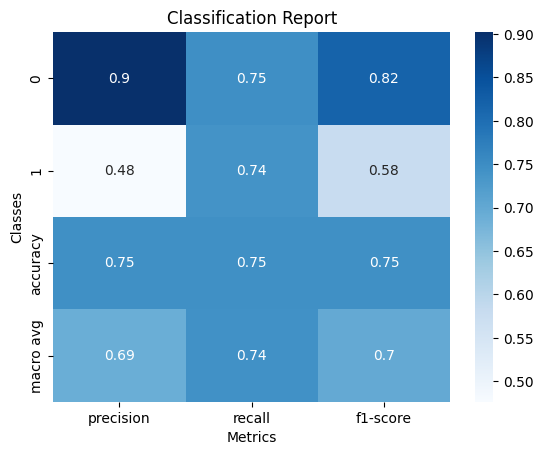

In [294]:
sns.heatmap(cl_accuracy_lr_df.iloc[:-1, :-1], annot = True, cmap = "Blues")
# Adding titles and labels
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')

plt.show()

**2.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.**

In [295]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier()

In [296]:
#Predicting the Model
y_pred_rf_model = rf_model.predict(X_test)

In [297]:
#Cross Validation score
from sklearn.model_selection import cross_val_score
cv_score_rf = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv = 5, scoring = 'accuracy')
print(cv_score_rf)

[0.96263736 0.96593407 0.96813187 0.97359736 0.97359736]


In [298]:
#Classification report
from sklearn.metrics import classification_report
cl_accuracy_rf = classification_report(y_test, y_pred_rf_model)
print(cl_accuracy_rf)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9154
           1       0.97      0.93      0.95      2846

    accuracy                           0.98     12000
   macro avg       0.97      0.96      0.97     12000
weighted avg       0.98      0.98      0.98     12000



In [299]:
#Convert the classification report into DataFrame
#converting into dictionary
cl_accuracy_rf = classification_report(y_test, y_pred_rf_model, output_dict = True)
cl_accuracy_rf


{'0': {'precision': 0.9786269430051814,
  'recall': 0.9903867161896439,
  'f1-score': 0.9844717124552069,
  'support': 9154},
 '1': {'precision': 0.9678362573099415,
  'recall': 0.9304286718200984,
  'f1-score': 0.9487638839125762,
  'support': 2846},
 'accuracy': 0.9761666666666666,
 'macro avg': {'precision': 0.9732316001575614,
  'recall': 0.9604076940048711,
  'f1-score': 0.9666177981838915,
  'support': 12000},
 'weighted avg': {'precision': 0.9760677520477937,
  'recall': 0.9761666666666666,
  'f1-score': 0.9760030057858463,
  'support': 12000}}

In [300]:
cl_accuracy_rf_df = pd.DataFrame(cl_accuracy_rf).transpose()
print(cl_accuracy_rf_df)

              precision    recall  f1-score       support
0              0.978627  0.990387  0.984472   9154.000000
1              0.967836  0.930429  0.948764   2846.000000
accuracy       0.976167  0.976167  0.976167      0.976167
macro avg      0.973232  0.960408  0.966618  12000.000000
weighted avg   0.976068  0.976167  0.976003  12000.000000


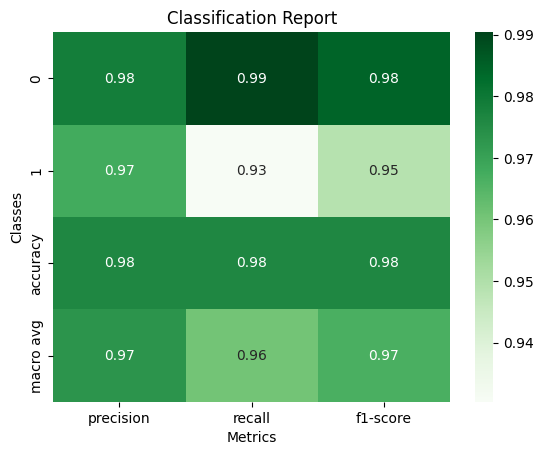

In [301]:
sns.heatmap(cl_accuracy_rf_df.iloc[:-1, :-1], annot = True, cmap = 'Greens')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

**3.	Train a  Gradient Boosting Classifier model and apply the 5-Fold CV and plot the classification report.**

In [302]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier()

In [303]:
#predicting the model
y_pred_gb_model = gb_model.predict(X_test)

In [304]:
#Cross Validation score
from sklearn.model_selection import cross_val_score
cv_score_gb = cross_val_score(gb_model, X_train_resampled, y_train_resampled, cv = 5, scoring = 'accuracy')
print(cv_score_gb)

[0.95494505 0.95714286 0.95824176 0.96369637 0.96259626]


In [305]:
#Classification report
from sklearn.metrics import classification_report
cl_accuracy_gb = classification_report(y_test,y_pred_gb_model)
print(cl_accuracy_gb)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9154
           1       0.94      0.92      0.93      2846

    accuracy                           0.97     12000
   macro avg       0.96      0.95      0.95     12000
weighted avg       0.97      0.97      0.97     12000



In [306]:
#Convert the classification report into DataFrame
cl_accuracy_gb = classification_report(y_test, y_pred_gb_model, output_dict = True)
cl_accuracy_gb

{'0': {'precision': 0.9765999129299086,
  'recall': 0.9802272230718811,
  'f1-score': 0.9784102060843964,
  'support': 9154},
 '1': {'precision': 0.9356330014224751,
  'recall': 0.9244553759662685,
  'f1-score': 0.9300106044538706,
  'support': 2846},
 'accuracy': 0.967,
 'macro avg': {'precision': 0.9561164571761918,
  'recall': 0.9523412995190748,
  'f1-score': 0.9542104052691336,
  'support': 12000},
 'weighted avg': {'precision': 0.9668839270840623,
  'recall': 0.967,
  'f1-score': 0.9669314338976901,
  'support': 12000}}

In [307]:
cl_accuracy_gb_df = pd.DataFrame(cl_accuracy_gb).transpose()
cl_accuracy_gb_df

,precision,recall,f1-score,support
0,0.976600,0.980227,0.978410,9154.000
1,0.935633,0.924455,0.930011,2846.000
accuracy,0.967000,0.967000,0.967000,0.967
macro avg,0.956116,0.952341,0.954210,12000.000
weighted avg,0.966884,0.967000,0.966931,12000.000


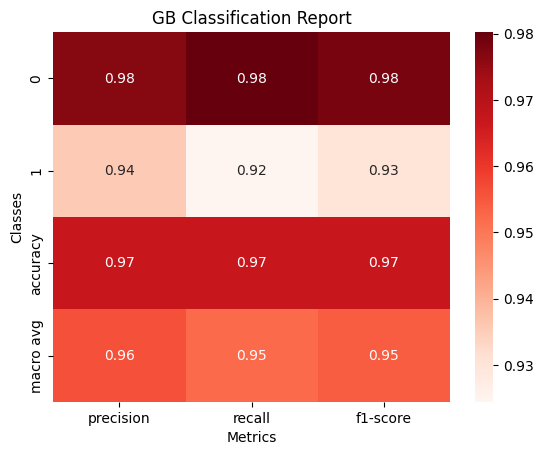

In [308]:
sns.heatmap(cl_accuracy_gb_df.iloc[:-1,:-1], annot = True, cmap = 'Reds')
plt.title('GB Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

##6.	Identify the best model and justify the evaluation metrics used.

1.	Find the ROC/AUC for each model and plot the ROC curve.

A) For Logistic Regression (lr)

In [309]:
# Calculate the ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score
roc, auc = roc_curve(y_test, y_pred_lr_model), roc_auc_score(y_test,y_pred_lr_model)



In [310]:
print(roc)

(array([0.        , 0.25278567, 1.        ]), array([0.        , 0.73963457, 1.        ]), array([2, 1, 0]))


In [311]:
#The AUC value provides a single number summary of the ROC curve, where a value of 1 represents a perfect model and a value of 0.5 represents a model with no discriminative power.
print(auc)


0.7434244536870548


In [312]:
#Plot ROC/AUC
fpr,tpr, thresholds = roc_curve(y_test,y_pred_lr_model)
roc_auc = roc_auc_score(y_test, y_pred_lr_model)


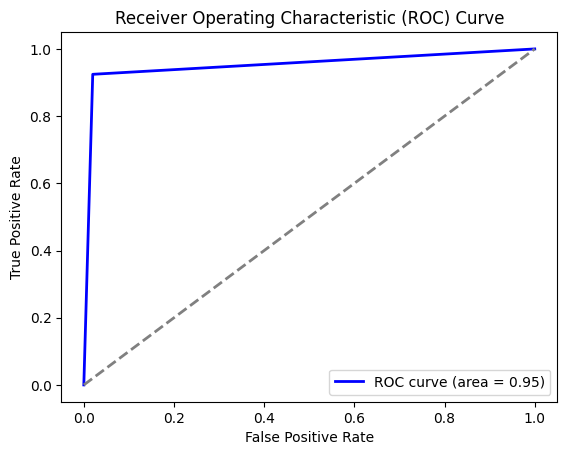

In [335]:
plt.figure()
plt.plot(fpr,tpr, color = 'blue', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim= [0.0, 1.0]
plt.ylim = [0.0, 1.0]
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

B) For Random Forest

In [318]:
from sklearn.metrics import roc_curve, roc_auc_score
roc, auc = roc_curve(y_test, y_pred_rf_model), roc_auc_score(y_test, y_pred_rf_model)

In [319]:
#printing auc score
print(auc)

0.9604076940048711


In [320]:
#plot roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_model)
roc_auc = roc_auc_score(y_test, y_pred_rf_model)

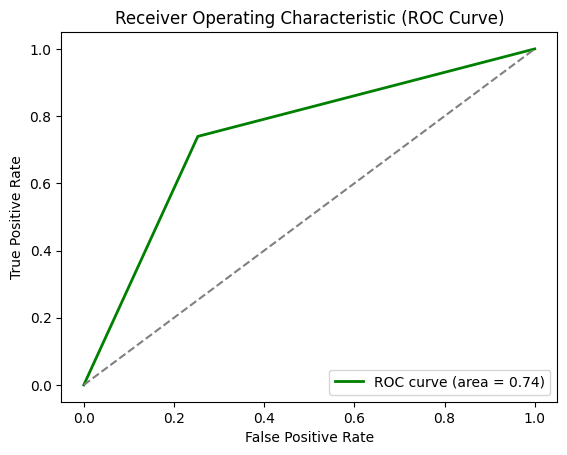

In [317]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color = 'green', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc )
plt.plot([0,1], [0,1], color = 'grey', linestyle = '--' )
plt.xlim = [0.0, 1.0]
plt.ylim = [0.0, 1.0]
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc = "lower right")
plt.show()

C) For Gradient Boosting classifier

In [321]:
from sklearn.metrics import roc_curve, roc_auc_score
roc,auc = roc_curve(y_test, y_pred_gb_model), roc_auc_score(y_test, y_pred_gb_model)

In [322]:
print(auc)

0.9523412995190748


In [323]:
#plot ROC Curve for Gradient Boosting classifier
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb_model)
roc_auc = roc_auc_score(y_test, y_pred_gb_model)


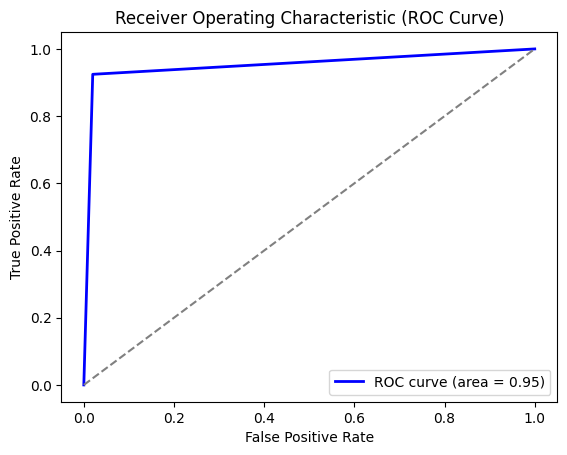

In [324]:
plt.plot(fpr,tpr, color = 'blue', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color = 'grey', linestyle = '--')
plt.xlim = [0.0, 1.0]
plt.ylim = [0.0, 1.0]
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc = 'lower right')
plt.show()

6.2.	Find the confusion matrix for each of the models.

In [325]:
from sklearn.metrics import confusion_matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr_model)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_model)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb_model)


In [326]:
#[TN (True Negative), FP (False Positive), FN (False Negative), TP (True Positive)]
print(conf_matrix_lr)

[[6840 2314]
 [ 741 2105]]


In [328]:
print(conf_matrix_rf)

[[9066   88]
 [ 198 2648]]


In [329]:
print(conf_matrix_gb)

[[8973  181]
 [ 215 2631]]


**6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?**




**Solution **:  Random Forest and Gradient Boost Classifier both have high precision and recall, indicating balanced performance with a slight edge in favor of *Random Forest due to slightly higher precision and recall.*[link text]

##7.	Suggest various retention strategies for targeted employees.

**7.1.	Using the best model, predict the probability of employee turnover in the test data.**

In [330]:
new_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred_rf_model})
print(new_df.head(10))

      Actual  Predicted
6723       0          0
6473       0          0
4679       0          0
862        1          1
7286       0          0
8127       0          0
3017       0          0
3087       0          0
6425       0          0
2250       0          1


**7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.**

■	Safe Zone (Green) (Score < 20%)

■	Low Risk Zone (Yellow) (20% < Score < 60%)

■	Medium Risk Zone (Orange) (60% < Score < 90%)

■	High Risk Zone (Red) (Score > 90%).


In [331]:
def zones(y_pred_rf_model):
  if y_pred_rf_model <0.2:
    return 'Safe Zone (Green)'
  elif y_pred_rf_model > 0.2 and y_pred_rf_model <0.6:
    return 'Low Risk Zone (Yellow)'
  elif y_pred_rf_model >0.6 and y_pred_rf_model <0.9:
    return 'Medium Risk Zone (Orange)'
  else:
    return 'High Risk Zone (Red)'

In [332]:
new_df['Zone'] = new_df['Predicted'].apply(zones)

In [333]:
print(new_df.head())

      Actual  Predicted                  Zone
6723       0          0     Safe Zone (Green)
6473       0          0     Safe Zone (Green)
4679       0          0     Safe Zone (Green)
862        1          1  High Risk Zone (Red)
7286       0          0     Safe Zone (Green)
